In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt



In [2]:
datafream = pd.read_csv ("iris.csv")
datafream

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [3]:
datafream.shape

(150, 5)

In [4]:
datafream.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [5]:
datafream.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
datafream.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal.length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal.width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal.length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal.width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [16]:
datafream.value_counts(["variety"])

variety   
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64

<Axes: ylabel='Density'>

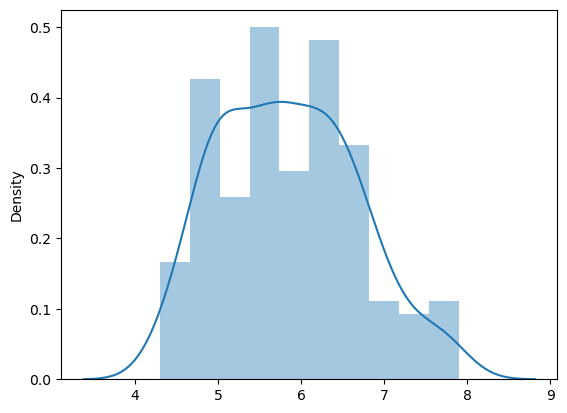

In [7]:
sns.distplot(x = datafream['sepal.length'],bins = 10)

<Axes: xlabel='sepal.length', ylabel='count'>

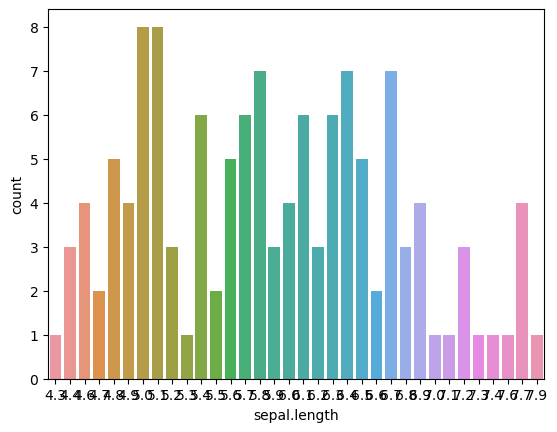

In [31]:
sns.countplot(x = datafream['sepal.length'])

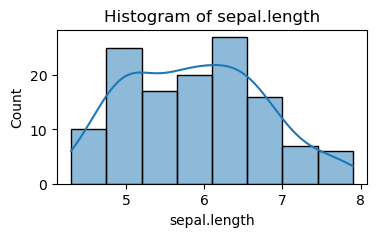

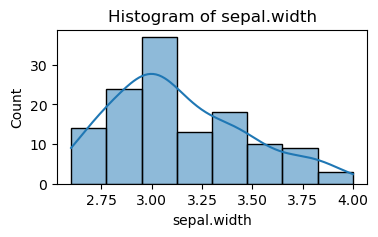

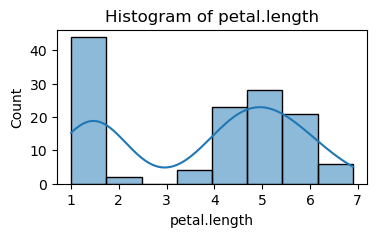

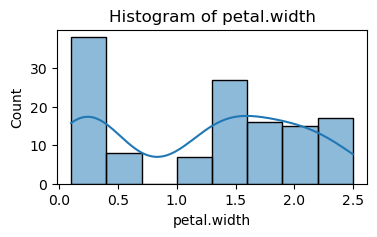

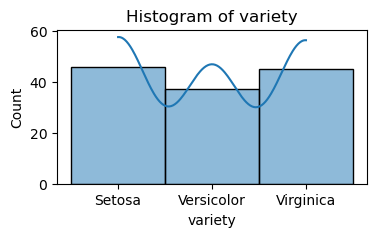

In [43]:

# Create histograms
for column in datafream.columns:
    plt.figure(figsize=(4,2))
    sns.histplot(datafream[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.show()


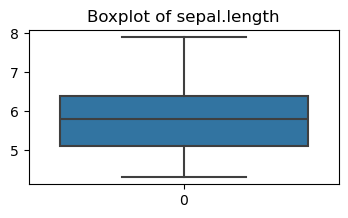

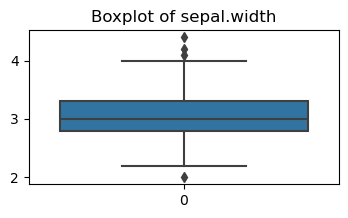

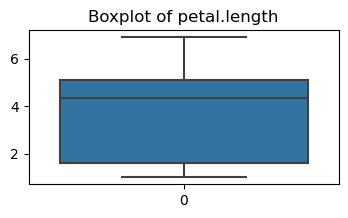

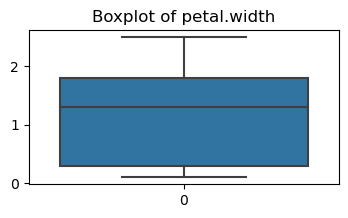

ValueError: could not convert string to float: 'Setosa'

<Figure size 400x200 with 0 Axes>

In [9]:
# Create boxplots
for column in datafream.columns:
    plt.figure(figsize=(4,2))
    sns.boxplot(datafream[column])
    plt.title(f'Boxplot of {column}')
    plt.show()


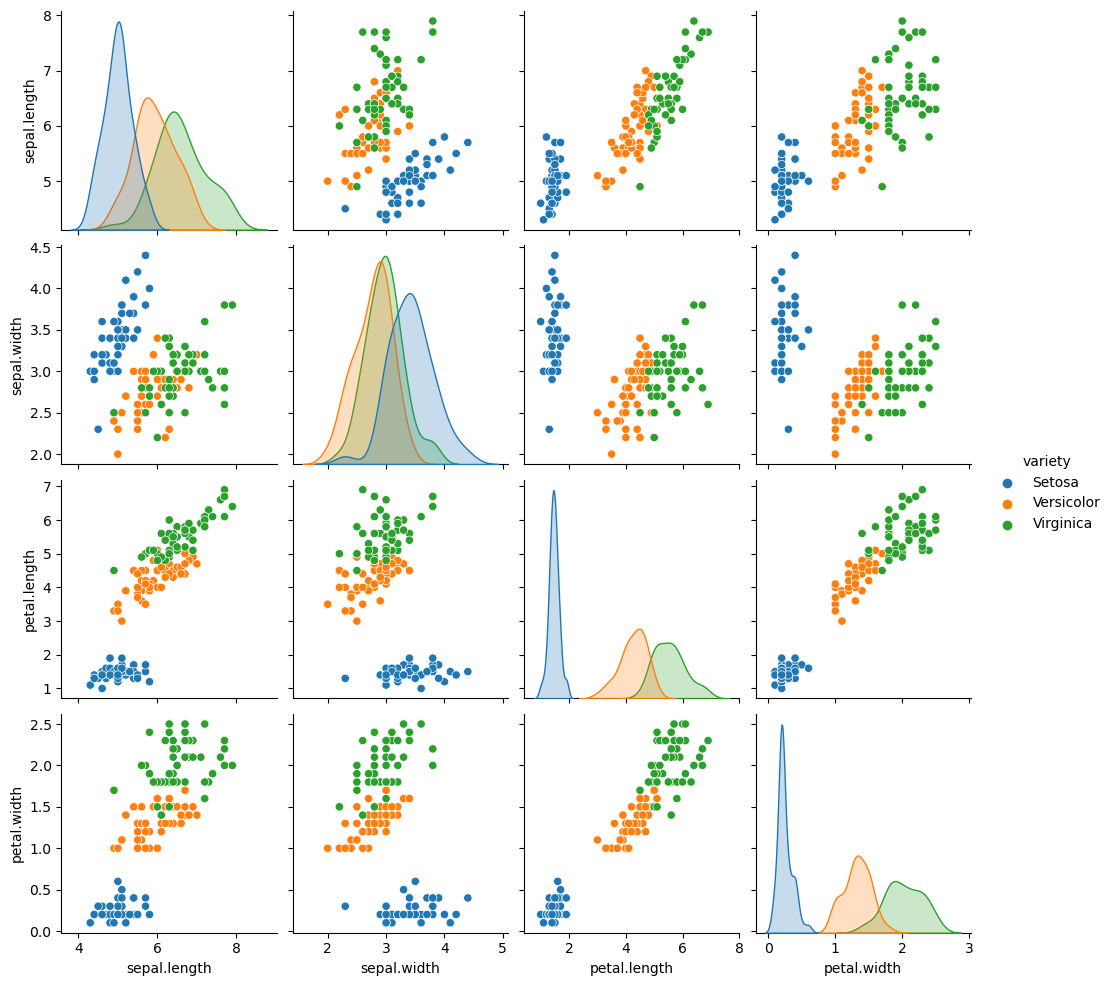

In [17]:
data = sns.pairplot(datafream,hue="variety") 
data

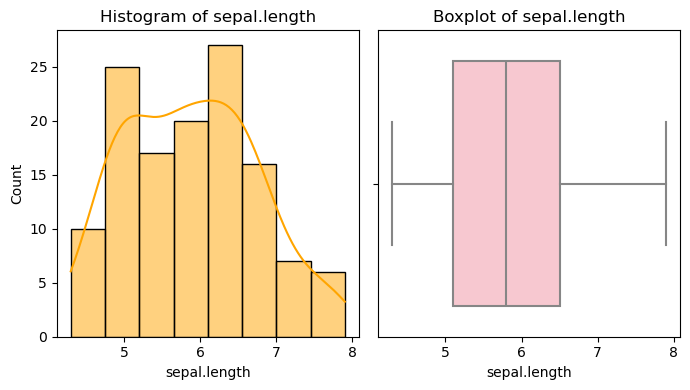

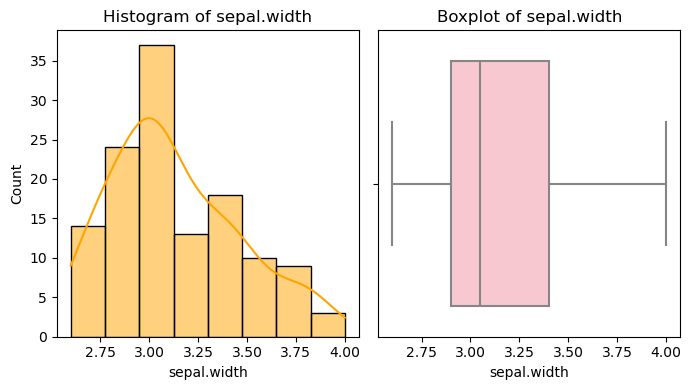

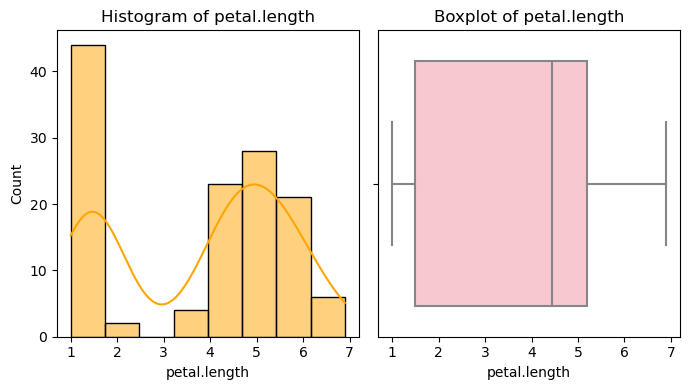

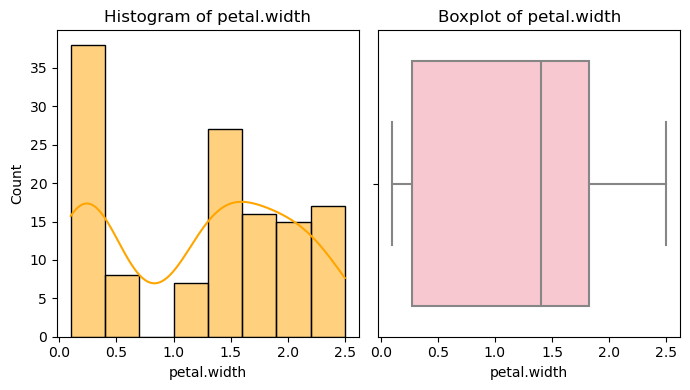

In [45]:
for column in datafream.columns[:-1]:  # Exclude the target variable for this analysis
    # Create a 1x2 grid for the plots
    fig, axes = plt.subplots(1, 2, figsize=(7,4))

    # Plot histogram
    sns.histplot(datafream[column], kde=True, ax=axes[0], color='orange')
    axes[0].set_title(f'Histogram of {column}')

    # Plot boxplot
    sns.boxplot(x=datafream[column], ax=axes[1], color='pink')
    axes[1].set_title(f'Boxplot of {column}')

    # Adjust layout
    plt.tight_layout()
    plt.show()

In [19]:
numeric_columns = datafream.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()
# Display the correlation matrix
print(correlation_matrix)

              sepal.length  sepal.width  petal.length  petal.width
sepal.length      1.000000    -0.117570      0.871754     0.817941
sepal.width      -0.117570     1.000000     -0.428440    -0.366126
petal.length      0.871754    -0.428440      1.000000     0.962865
petal.width       0.817941    -0.366126      0.962865     1.000000


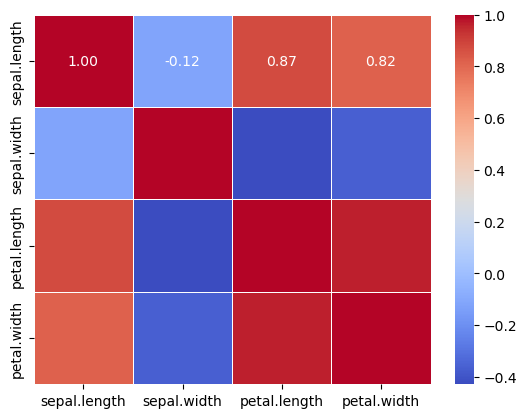

In [20]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

In [21]:
Q1 = np.percentile(datafream['sepal.width'],25, 
                 interpolation = 'midpoint')
Q3 = np.percentile(datafream['sepal.width'],75,
                 interpolation = 'midpoint')

# formula
IQR = Q3-Q1

print("Old Shape:", datafream.shape)


Old Shape: (150, 5)


In [22]:
#Upper bound
upper = np.where(datafream['sepal.width'] >= (Q3+1.5*IQR))

#Lower bound
Lower = np.where(datafream['sepal.width'] <= (Q3-1.5*IQR))

new shape: (128, 5)


<Axes: xlabel='sepal.width'>

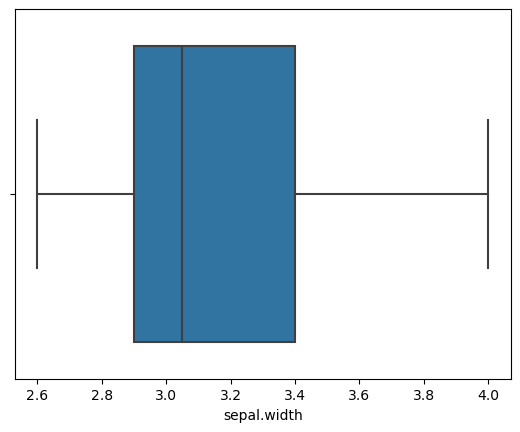

In [23]:
#Removing the outliers
datafream.drop(upper[0], inplace = True)
datafream.drop(Lower[0], inplace = True)

print('new shape:', datafream.shape)

sns.boxplot(x='sepal.width', data=datafream)


<Axes: xlabel='sepal.length', ylabel='sepal.width'>

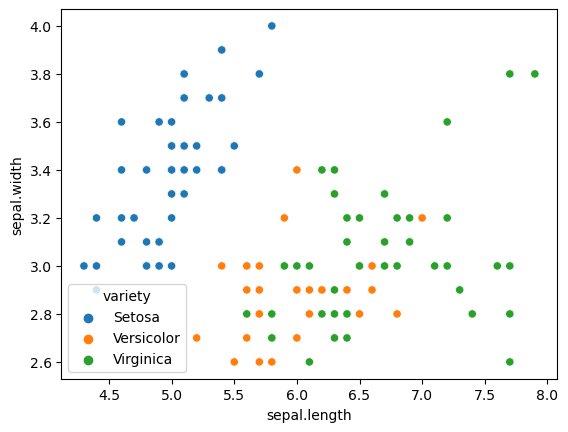

In [33]:
sns.scatterplot(x='sepal.length',y='sepal.width',data=datafream,hue='variety')

<Axes: xlabel='petal.length', ylabel='petal.width'>

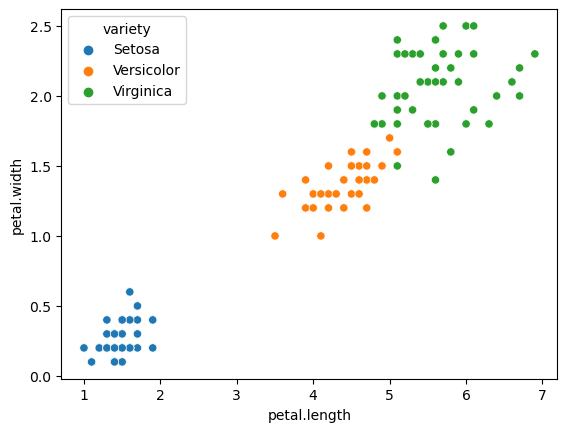

In [35]:
sns.scatterplot(x='petal.length',y='petal.width',data=datafream,hue='variety')

<Axes: xlabel='variety', ylabel='count'>

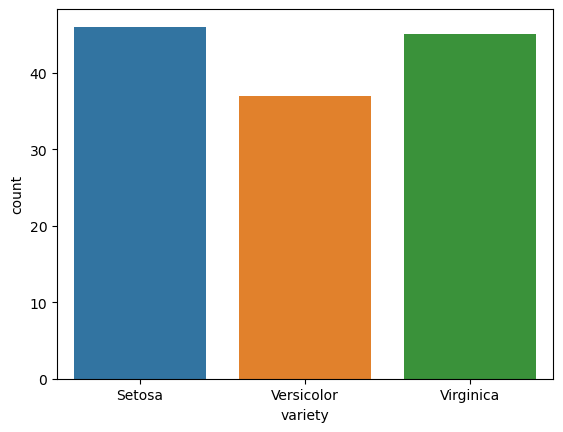

In [42]:
sns.countplot(x='variety',data=datafream)

<Axes: xlabel='petal.length', ylabel='sepal.width'>

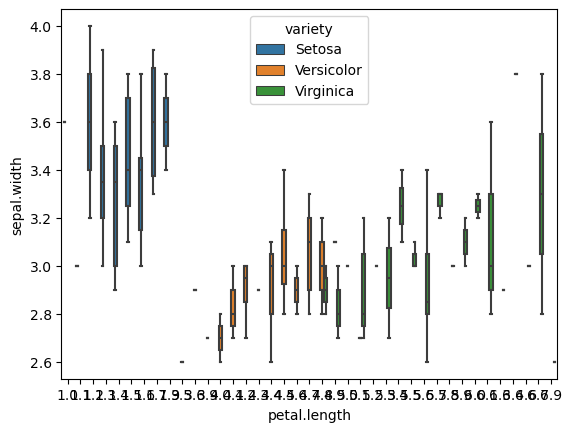

In [41]:
sns.boxplot(x = 'petal.length', y = 'sepal.width', data= datafream,hue='variety')